In [1]:
from google_pygram import GooglePyGram as gpg
import numpy as np
import pandas as pd
import codecs
import string
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist
import gensim

### Names of group members
Group Number: 

Name A: Simone Garau

Name B:


# Part 1: Visualizing the Frequency of Terms with Google Pygram

In this section, we will visualize the frequency of a specific phrase, "Google *", from 1980 to 2019.

## Set the search parameters


In [2]:
# Assign the start and end year for the search
search_start_year = 1980
search_end_year = 2019

# Define the phrase(s) to search for in the Google Pygram
google_phrases = ["Google *"]

## Retrieve the Ngram Data
Use GooglePyGram to fetch the frequency data for the specified phrases over the given time period.


In [3]:
# Get the pygram for the specified phrases
pygram = gpg(
    corpus='English',
    corpus_year=2019,
    start_year=search_start_year,
    end_year=search_end_year,
    smoothing=3,
    case_sensitive=False,
    phrases=google_phrases
)

# Convert the fetched data into a DataFrame
google_ngram = pygram.to_df()
google_ngram.head()

,year,Google *,Google 's,Google Map,Google and,Google search,Google Earth,Google Maps,Google Scholar,Google Play,Google is,Google Analytics
1980,1980.0,2.530332e-09,6.775422e-10,0.000000e+00,1.291290e-09,1.890642e-10,9.275437e-11,1.204159e-10,2.705654e-11,0.0,1.322086e-10,0.000000e+00
1981,1981.0,2.481491e-09,6.233183e-10,0.000000e+00,1.317528e-09,1.512514e-10,1.554880e-10,9.633273e-11,3.180580e-11,0.0,1.057669e-10,0.000000e+00
1982,1982.0,2.413296e-09,5.605494e-10,0.000000e+00,1.344644e-09,1.753838e-10,1.295734e-10,8.027728e-11,2.650483e-11,0.0,9.636257e-11,0.000000e+00
1983,1983.0,6.461255e-09,2.155898e-09,7.039609e-12,2.039543e-09,5.797451e-10,6.319940e-10,3.644727e-10,8.607491e-11,0.0,5.542503e-10,4.223766e-11
1984,1984.0,6.658677e-09,2.293158e-09,2.801521e-11,2.029880e-09,5.841601e-10,6.790044e-10,3.644727e-10,1.000586e-10,0.0,5.376897e-10,4.223766e-11


## Visualize the Frequency Data
Now, we will plot the frequency of the phrase over the specified time period.


<Axes: xlabel='year'>

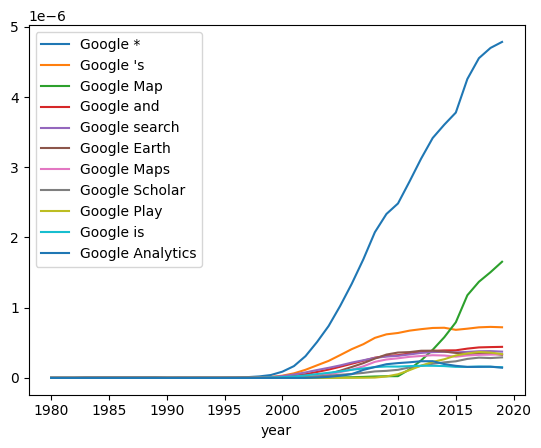

In [6]:
# Plot the frequency of the phrase over time
google_ngram.plot(x='year')

# Now we will repeat the process for a different time frame (1999-2019)

## Set the new search parameters


In [7]:
# Assign the new start and end year for the search
search_start_year = 1999
search_end_year = 2019

In [9]:
# Get the pygram for the specified phrases again
pygram = gpg(
    corpus='English',
    corpus_year=2019,
    start_year=search_start_year,
    end_year=search_end_year,
    smoothing=3, # The smoothing parameter. Must be between 0 and 5.
    case_sensitive=False,
    phrases=google_phrases
)

# Convert the fetched data into a DataFrame
google_ngram = pygram.to_df()
google_ngram.head()

,year,Google *,Google 's,Google Map,Google and,Google search,Google Earth,Google Maps,Google Scholar,Google Play,Google is,Google Analytics
1999,1999.0,6.796939e-08,2.179337e-08,1.953862e-11,1.369205e-08,1.993551e-08,5.996701e-10,3.147102e-10,2.593328e-10,1.495338e-09,9.841254e-09,1.861909e-11
2000,2000.0,1.224874e-07,4.463377e-08,2.255354e-11,2.220986e-08,3.614868e-08,8.327909e-10,4.386796e-10,5.259079e-10,1.660088e-09,1.598634e-08,2.874056e-11
2001,2001.0,1.952085e-07,7.568997e-08,1.879461e-11,3.396602e-08,5.696514e-08,1.280070e-09,5.120858e-10,1.086323e-09,1.535561e-09,2.412494e-08,2.958583e-11
2002,2002.0,3.098341e-07,1.158559e-07,2.309296e-10,5.297920e-08,7.846729e-08,6.298913e-09,5.768510e-09,1.241377e-08,1.408261e-09,3.609952e-08,3.117858e-10
2003,2003.0,5.119103e-07,1.796415e-07,2.716827e-09,8.517557e-08,1.124248e-07,2.218094e-08,2.657810e-08,2.061963e-08,1.645878e-09,5.505151e-08,5.875555e-09


<Axes: xlabel='year'>

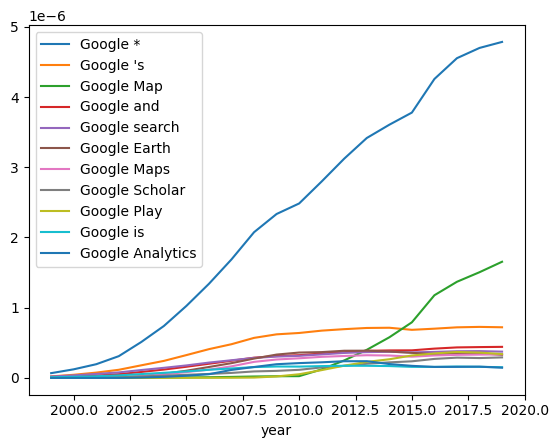

In [10]:
# Plot the frequency of the phrase over the new time period
google_ngram.plot(x='year')

# Pre-process the DataFrame

Now we will clean the DataFrame by dropping specific columns that are not needed for our analysis.


<Axes: xlabel='year'>

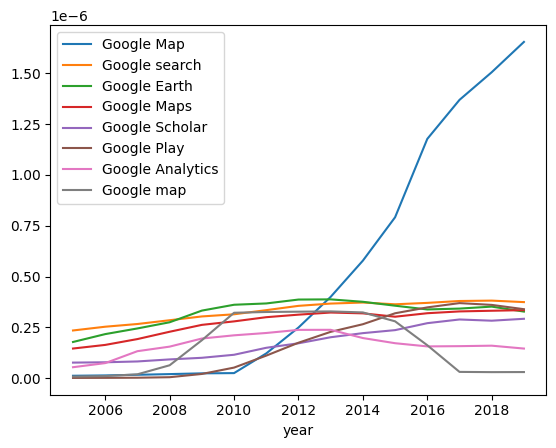

In [21]:
# Drop unnecessary columns from the DataFrame
column_names = google_ngram.columns
google_ngram = google_ngram.drop(columns=['Google *', 'Google and', "Google 's"])
#column_names

# Visualize the cleaned DataFrame
google_ngram.plot(x="year")


# Computational Approach

Now, we will calculate the dissimilarities between two phrases: "Google Map" and "Google search".

## Compute Dissimilarity


In [12]:
# Compute the dissimilarity between the two phrases 'Google Map' and 'Google search'
dissimilarity = np.log(google_ngram['Google Map'] / google_ngram['Google search']) * google_ngram['Google Map']

# Convert the dissimilarity data into a DataFrame for visualization
dissimilarity_df = pd.DataFrame(dissimilarity)
dissimilarity_df

,0
1999,-1.353609e-10
2000,-1.664339e-10
2001,-1.506694e-10
2002,-1.345932e-09
2003,-1.011426e-08
2004,-1.512599e-08
2005,-2.248330e-08
2006,-3.047457e-08
2007,-4.130497e-08
2008,-5.357486e-08


## Visualize the Dissimilarity Data
Let’s visualize the dissimilarity data computed in the previous step.


<Axes: title={'center': 'Dissimilarity between Google Map and Google search'}>

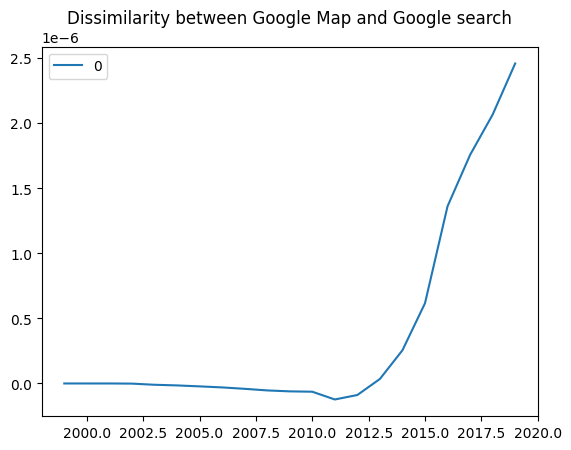

In [13]:
# Plot the dissimilarity values over time
dissimilarity_df.plot(title='Dissimilarity between Google Map and Google search')


# Part 1 Tasks: Further Analysis

Now, redo all the steps above to visualize and calculate the time period of dissimilarities between two new terms in the following phrases.

### Task 1: Android *
#### Tips: Use a start year of 2005 and an end year of 2019.

In [27]:
search_start_year = 2005
search_end_year = 2019

# Define the phrase(s) to search for in the Google Pygram
android_phrases = ["Android *"]

In [28]:
# Get the pygram for the specified phrases again
pygram = gpg(
    corpus='English',
    corpus_year=2019,
    start_year=search_start_year,
    end_year=search_end_year,
    smoothing=3,
    case_sensitive=False,
    phrases=android_phrases
)

# Convert the fetched data into a DataFrame
android_ngram = pygram.to_df()
android_ngram.head()

,year,Android *,Android Studio,Android devices,Android SDK,Android device,Android and,Android application,Android Market,Android applications,Android operating,Android phone
2005,2005.0,1.015702e-08,0.0,4.417901e-10,2.932330e-09,3.485391e-10,2.160262e-09,1.118897e-09,2.485025e-10,1.830635e-09,7.111421e-10,3.649193e-10
2006,2006.0,3.370261e-08,0.0,1.759892e-09,9.728065e-09,1.541215e-09,3.992268e-09,4.256901e-09,2.998001e-09,5.347711e-09,1.858741e-09,2.219815e-09
2007,2007.0,9.526573e-08,0.0,7.033637e-09,2.226279e-08,5.152677e-09,7.767424e-09,1.002643e-08,1.953330e-08,1.130498e-08,5.375559e-09,6.808939e-09
2008,2008.0,2.372502e-07,0.0,2.260760e-08,4.878329e-08,2.189599e-08,1.638870e-08,2.455398e-08,5.532935e-08,2.195677e-08,1.257751e-08,1.315706e-08
2009,2009.0,3.640364e-07,0.0,3.870747e-08,7.120565e-08,3.889530e-08,2.633776e-08,3.783925e-08,7.432974e-08,3.259367e-08,2.082303e-08,2.330455e-08


<Axes: xlabel='year'>

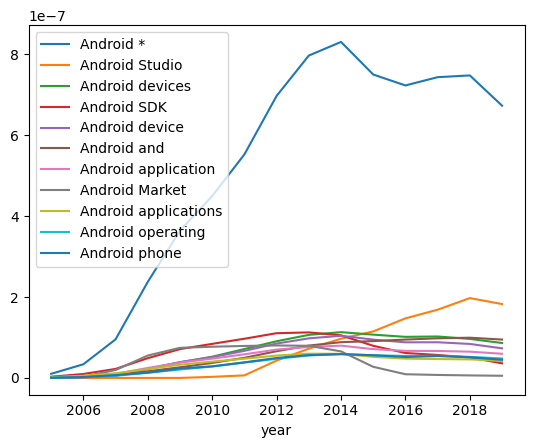

In [30]:
# Plot the frequency of the phrase over the new time period
android_ngram.plot(x='year')

<Axes: xlabel='year'>

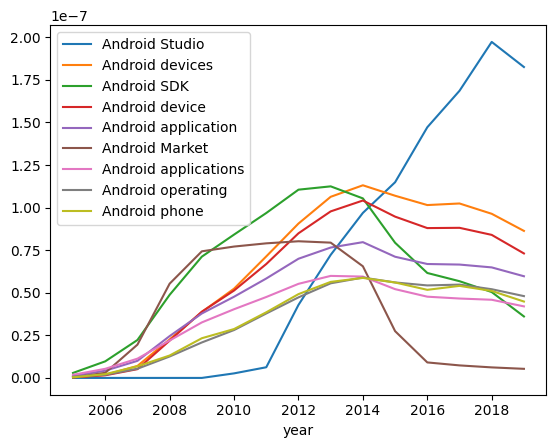

In [31]:
# Drop unnecessary columns from the DataFrame
android_ngram = android_ngram.drop(columns=['Android *', 'Android and'])

# Visualize the cleaned DataFrame
android_ngram.plot(x="year")

## Compute dissimilarity

In [32]:
# Compute the dissimilarity between the two phrases 'Google Map' and 'Google search'
dissimilarity_t1 = np.log(android_ngram['Android Studio'] / android_ngram['Android devices']) * android_ngram['Android Studio']

# Convert the dissimilarity data into a DataFrame for visualization
dissimilarity_df = pd.DataFrame(dissimilarity_t1)
dissimilarity_df

c:\Users\web\Documents\Uni\IR\Assignment3-IR\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,0
2005,NaN
2006,NaN
2007,NaN
2008,NaN
2009,NaN
2010,-7.947543e-09
2011,-1.523809e-08
2012,-3.209423e-08
2013,-2.792453e-08
2014,-1.498306e-08


## Visualize the dissimilarity data

<Axes: title={'center': 'Dissimilarity between Android Studio and Android devices'}>

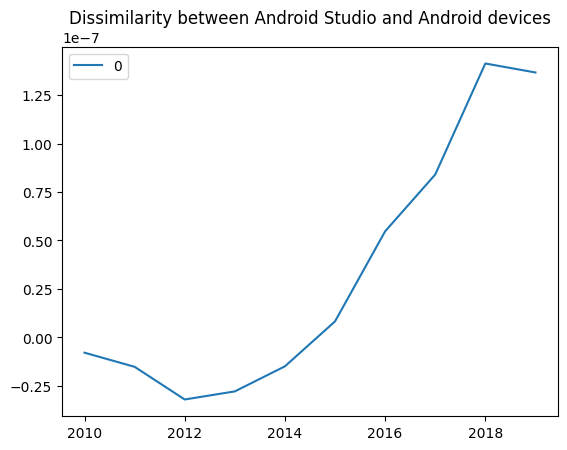

In [33]:
# Plot the dissimilarity values over time
dissimilarity_df.plot(title='Dissimilarity between Android Studio and Android devices')

### Task 2: Machine Learning with *
#### Tips: Use a start year of 2010 and an end year of 2019.

In [34]:
search_start_year = 2010
search_end_year = 2019

# Define the phrase(s) to search for in the Google Pygram
ml_phrases = ["Machine Learning with *"]

In [35]:
# Get the pygram for the specified phrases again
pygram = gpg(
    corpus='English',
    corpus_year=2019,
    start_year=search_start_year,
    end_year=search_end_year,
    smoothing=3,
    case_sensitive=False,
    phrases=ml_phrases
)

# Convert the fetched data into a DataFrame
ml_ngram = pygram.to_df()
ml_ngram.head()

,year,Machine Learning with *,Machine Learning with Spark,Machine Learning with R,Machine Learning with Python,Machine Learning with Scikit,Machine Learning with R.
2010,2010.0,7.144904e-11,0.000000e+00,7.144904e-11,0.000000e+00,0.000000e+00,0.000000e+00
2011,2011.0,2.012575e-10,0.000000e+00,1.600866e-10,0.000000e+00,0.000000e+00,4.117094e-11
2012,2012.0,8.907193e-10,2.431925e-10,5.409172e-10,1.314554e-11,1.314554e-11,8.031850e-11
2013,2013.0,2.049254e-09,8.964558e-10,8.527610e-10,1.917280e-10,1.126760e-11,9.704136e-11
2014,2014.0,4.213915e-09,1.904805e-09,1.291173e-09,7.671444e-10,9.895010e-11,1.518429e-10


## Plot ngram

<Axes: xlabel='year'>

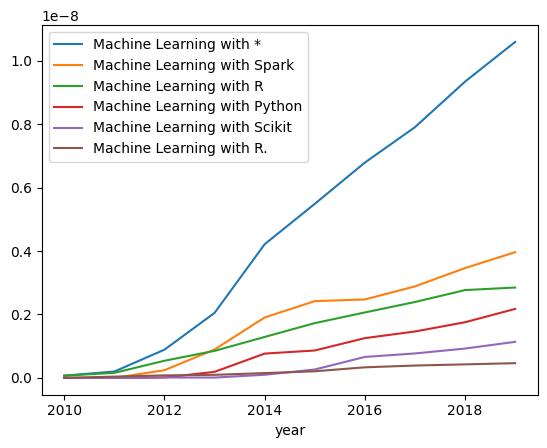

In [36]:
# Plot the frequency of the phrase over the new time period
ml_ngram.plot(x='year')

<Axes: xlabel='year'>

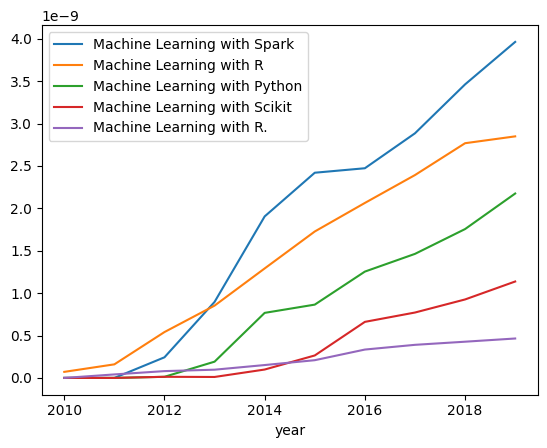

In [37]:
# Drop unnecessary columns from the DataFrame
ml_ngram = ml_ngram.drop(columns=['Machine Learning with *'])

# Visualize the cleaned DataFrame
ml_ngram.plot(x="year")

## Compute dissimilarity

In [38]:
# Compute the dissimilarity between the two phrases 'Google Map' and 'Google search'
dissimilarity_t2 = np.log(ml_ngram['Machine Learning with Spark'] / ml_ngram['Machine Learning with R']) * ml_ngram['Machine Learning with Spark']

# Convert the dissimilarity data into a DataFrame for visualization
dissimilarity_df = pd.DataFrame(dissimilarity_t2)
dissimilarity_df

c:\Users\web\Documents\Uni\IR\Assignment3-IR\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,0
2010,NaN
2011,NaN
2012,-1.944112e-10
2013,4.479565e-11
2014,7.406412e-10
2015,8.165247e-10
2016,4.472885e-10
2017,5.399744e-10
2018,7.743620e-10
2019,1.307690e-09


## Visualize the dissimilarity data

<Axes: title={'center': 'Dissimilarity between Machine Learning with Spark and Machine Learning with R'}>

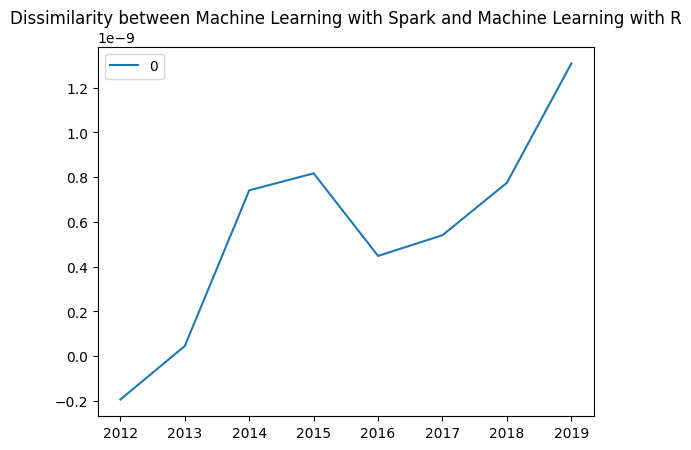

In [39]:
# Plot the dissimilarity values over time
dissimilarity_df.plot(title='Dissimilarity between Machine Learning with Spark and Machine Learning with R')

### Task 3:  Norwegian Computer *
#### Tips: Use a start year of 1960 and an end year of 2019.

In [390]:
# Enter code here

# Part 2: Gensim Library

## Introduction
Gensim is a Python library for topic modeling, document indexing, and similarity retrieval. It is primarily aimed at the natural language processing (NLP) and information retrieval (IR) communities.

## 1. Data Loading and Preprocessing

### 1.0. Fix Random Number Generator
```python
import random
# Set the seed for reproducibility
random.seed(123)


In [40]:
import random
random.seed(123)

In [42]:
# Open the file with UTF-8 encoding
file_path = "pg3300.txt"  # Make sure to download the file from the provided URL
with codecs.open(file_path, "r", "utf-8") as f:
    content = f.read()  # Read the entire content of the file

In [392]:
# Split the content into paragraphs by separating based on empty lines
paragraphs = ...

In [393]:
# Filter out any paragraphs that contain the word "Gutenberg"
paragraphs = ...

In [394]:
len(paragraphs)

191

In [395]:
# Tokenize the paragraphs into lists of words
tokenized_paragraphs =   # Simple split for tokenization

In [396]:
tokenized_paragraphs[5]

['***',
 'START',
 'OF',
 'THE',
 'PROJECT',
 'GUTENBERG',
 'EBOOK',
 'AN',
 'INQUIRY',
 'INTO',
 'THE',
 'NATURE',
 'AND',
 'CAUSES',
 'OF',
 'THE',
 'WEALTH',
 'OF',
 'NATIONS',
 '***']

In [397]:
# Remove punctuation and convert to lower case
def clean_paragraph(paragraph):
    #!To-do

cleaned_paragraphs = [clean_paragraph(p) for p in tokenized_paragraphs]

In [398]:
cleaned_paragraphs[5]

['***',
 'start',
 'of',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'an',
 'inquiry',
 'into',
 'the',
 'nature',
 'and',
 'causes',
 'of',
 'the',
 'wealth',
 'of',
 'nations',
 '***']

In [399]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Stem words in each paragraph
stemmed_paragraphs = [[stemmer.stem(word) for word in paragraph] for paragraph in cleaned_paragraphs]

In [400]:
stemmed_paragraphs[5]

['***',
 'start',
 'of',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'an',
 'inquiri',
 'into',
 'the',
 'natur',
 'and',
 'caus',
 'of',
 'the',
 'wealth',
 'of',
 'nation',
 '***']

In [401]:
# Create a frequency distribution of words in the corpus
flat_list = ... # Flatten the list
freq_dist = FreqDist(flat_list)

# Example to see the count of the word 'tax'
print(freq_dist["money"]) #428

428


In [ ]:
 # Plot the frequency distribution of the top 15 words of the preprocessed data

In [402]:
# Create a Gensim dictionary mapping words to integers
dictionary = gensim.corpora.Dictionary(stemmed_paragraphs)

In [403]:
# Define stop words
stopwords = set(["the", "is", "in", "and", "to", "of"])  # Expand with a list of common stop words
stop_ids = [dictionary.token2id[word] for word in stopwords if word in dictionary.token2id]

# Filter out stop words from the dictionary
dictionary.filter_tokens(stop_ids)

In [404]:
# Convert paragraphs into Bags-of-Words representation
corpus = [dictionary.doc2bow(paragraph) for paragraph in stemmed_paragraphs]

In [405]:
corpus[5]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (7, 1),
 (26, 2),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1)]

In [406]:
# Build the TF-IDF model
tfidf_model = ...

In [407]:
# Convert Bags-of-Words into TF-IDF weights
tfidf_corpus = ...

In [408]:
# Create a similarity matrix to calculate similarities
tfidf_index = gensim.similarities.MatrixSimilarity(tfidf_corpus)

In [409]:
# Create an LSI model from the TF-IDF corpus
lsi_model = gensim.models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=100)
lsi_corpus = lsi_model[tfidf_corpus]

# Create a similarity index for the LSI model
lsi_index = ...

In [412]:
# Show the first 3 LSI topics
print(lsi_model.show_topics(num_topics=3))

[(0, '0.324*"a" + 0.296*"it" + 0.224*"which" + 0.206*"be" + 0.202*"that" + 0.166*"as" + 0.157*"by" + 0.155*"or" + 0.144*"for" + 0.144*"their"'), (1, '-0.751*"0" + -0.325*"1" + -0.307*"2" + -0.248*"8" + -0.219*"4" + -0.157*"6" + -0.120*"10" + -0.101*"3" + -0.094*"16" + -0.080*"£"'), (2, '0.695*"chapter" + 0.236*"i." + 0.206*"iv." + 0.183*"divis" + 0.182*"v." + 0.182*"iii." + 0.174*"ii." + 0.153*"labour." + 0.141*"stock." + 0.104*"vii."')]


In [416]:
# Function to preprocess query similar to preprocessing in part 1
def preprocess_query(query):
    #!To-do

query = preprocess_query("Do state accept individual donations?") #IMPORTANT: Modify this to the required query for submission.

query_bow = dictionary.doc2bow(query)  # Convert to Bag-of-Words representation

In [417]:
query

['do', 'state', 'accept', 'individu', 'donations?']

In [418]:
query_bow

[(130, 1), (252, 1), (312, 1), (2076, 1)]

In [419]:
# Convert query to TF-IDF representation
query_tfidf = tfidf_model[query_bow]
print(query_tfidf)

[(130, 0.31333227650935724), (252, 0.35786192043525433), (312, 0.5374694327577204), (2076, 0.6963363693294712)]


In [420]:
# Calculate similarities for the query
doc2similarity = enumerate(tfidf_index[query_tfidf])
top_paragraphs_tfidf = sorted(doc2similarity, key=lambda kv: -kv[1])[:3]

# Display the original paragraphs
for idx, _ in top_paragraphs_tfidf:
    
    lines = paragraphs[idx].split('\n')

    # Clean the lines by stripping any extra spaces
    cleaned_lines = [line.strip() for line in lines if line.strip()]

    # Select the top five lines
    top_five_lines = ...
    
    # Print the result
    print(f"[Paragraph {idx}]")
    for line in top_five_lines:
        
        print(line)
        
    print("\n")

[Paragraph 187]
While we cannot and do not solicit contributions from states where we
have not met the solicitation requirements, we know of no prohibition
against accepting unsolicited donations from donors in such states who
approach us with offers to donate.


[Paragraph 92]
CHAPTER II.
OF THE DISCOURAGEMENT OF AGRICULTURE
IN THE ANCIENT STATE OF EUROPE, AFTER THE FALL OF THE ROMAN EMPIRE.


[Paragraph 184]
1.F.5. Some states do not allow disclaimers of certain implied
warranties or the exclusion or limitation of certain types of
damages. If any disclaimer or limitation set forth in this agreement
violates the law of the state applicable to this agreement, the
agreement shall be interpreted to make the maximum disclaimer or




In [422]:
# Convert query TF-IDF representation to LSI representation
lsi_query = lsi_model[query_tfidf]

# Report top 3 topics with the largest absolute weights
top_topics = sorted(lsi_query, key=lambda kv: -abs(kv[1]))[:3]
print(top_topics)

# Report top 3 relevant paragraphs according to LSI model
doc2similarity_lsi = enumerate(lsi_index[lsi_query])
top_paragraphs_lsi = sorted(doc2similarity_lsi, key=lambda kv: -kv[1])[:3]

# Display the original paragraphs
for idx, _ in top_paragraphs_lsi:
    lines = paragraphs[idx].split('\n')

    # Clean the lines by stripping any extra spaces
    cleaned_lines = [line.strip() for line in lines if line.strip()]

    # Select the top five lines
    top_five_lines = ...
    
    # Print the result
    print(f"[Paragraph {idx}]")
    for line in top_five_lines:
        
        print(line)
        
    print("\n")

[(64, -0.0827253926481809), (20, -0.07439897414870802), (66, -0.06438294642252618)]
[Paragraph 187]
While we cannot and do not solicit contributions from states where we
have not met the solicitation requirements, we know of no prohibition
against accepting unsolicited donations from donors in such states who
approach us with offers to donate.


[Paragraph 184]
1.F.5. Some states do not allow disclaimers of certain implied
warranties or the exclusion or limitation of certain types of
damages. If any disclaimer or limitation set forth in this agreement
violates the law of the state applicable to this agreement, the
agreement shall be interpreted to make the maximum disclaimer or


[Paragraph 186]
The Foundation is committed to complying with the laws regulating
charities and charitable donations in all 50 states of the United
States. Compliance requirements are not uniform and it takes a
considerable effort, much paperwork and many fees to meet and keep up
with these requirements. We do